Usaremos o mesmo grafo da prática anterior e sua implementação. Por isso, será apresentado novamente o funcionamento e implementação dele a seguir. Usaremos o grafo da imagem a seguir para exemplificar como suas componentes seriam representadas em código.

<img src="imgs/grafo.png">
Fonte: https://www.geeksforgeeks.org/graph-implementation-using-stl-for-competitive-programming-set-2-weighted-graph/

**Vértices:** nessa atividade, os vértices são representados por uma instância da classe _vértice_, que contem o valor ou nome do vértice e um dicionário que contém tuplas $(v, p)$, sendo $v$ o vértice vizinho e $p$ o peso da aresta que liga os respectivos vértices. Os métodos já implementados na classe vértice são os seguintes:

- `insere`: recebe o vértice vizinho e o peso da aresta que liga os dois vértices
- `obtem_valor`: retorna o valor/nome do vértice

O vértice $0$ teria as seguintes propriedades:

- `valor`= 0
- `adjacencias`= { Vertice(1): 10, Vertice(2) : 3, Vertice(3): 2 }

Já o vértice $3$ teria as seguintes propriedades:
- `valor`=3
- `adjacencias`= {}

**Grafo:** o grafo é representado como um dicionário que contém tuplas $(n, v)$, sendo $n$ o nome/valor do vértice e $v$ a instância do vértice. Os métodos já implementados na classe grafo são:

- `adiciona_vertice`: cria um novo vértice no grafo com o nome/valor passado como parâmetro
- `adiciona_aresta`: cria uma aresta direcionada de $v1$ para $v2$ com o peso $p$, sendo $v1$ o vértice que corresponde ao valor passado no primeiro parâmetro, $v2$ o vértice que corresponde ao valor passado no segundo parâmetro e $p$ o terceiro parâmetro
- `obtem_vertice`: retorna o vértice correspondente ao valor passado como parâmetro, caso ele exista

Esse grafo teria a seguinte propriedade:
- `vertices` = { 0: Vertice(0), 1: Vertice(1), 2: Vertice(2), 3: Vertice(3) }

**Exemplo**: Para construir o grafo abaixo no código, considerando todas as arestas com peso 2, seriam necessários os comandos a seguir:
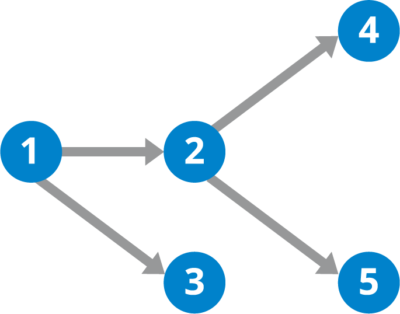
Fonte: https://hazelcast.com/glossary/directed-acyclic-graph/


In [ ]:
from grafo import Grafo

grafo = Grafo()

grafo.adiciona_vertice(1)
grafo.adiciona_vertice(2)
grafo.adiciona_vertice(3)
grafo.adiciona_vertice(4)
grafo.adiciona_vertice(5)

grafo.adiciona_aresta(1, 2, 2)
grafo.adiciona_aresta(1, 3, 2)
grafo.adiciona_aresta(2, 4, 2)
grafo.adiciona_aresta(2, 5, 2)

## Algoritmo de Dijkstra

Iremos implementar o algoritmo de dijsktra baseando-se [no pseudocódigo deste slide](https://docs.google.com/presentation/d/1K9wlpT1GMgLtoOiRDy4Ib8z8-1VKwyXEUU0hI1zuEyU/edit?usp=sharing). Assim, faça as seguintes atividades: 

**Atividade 1: Construção do Min-Heap:** Nesta tarefa, iremos usar uma fila de prioridades implementadas usando um Heap. Porém, neste caso será um Min-Heap, pois, quanto menor a distancia, maior a prioridade. Assim, você deverá usar sua implementação de max-heap e implementar o min-heap. Para isso, continue a implementação da classe MinHeap do arquivo `heap.py` e execute os testes abaixo. 

In [ ]:
!python3 -m dijkstra_teste TestHeap.test_refaz

In [ ]:
!python3 -m dijkstra_teste TestHeap.test_insere

In [ ]:
!python3 -m dijkstra_teste TestHeap.test_retira_min

**Atividade 2: Comparador de distancia para um determinado vértice:** Cada elemento deste heap será uma instancia da classe `DistanciaVerticeOrigem` cujo o início de sua implementação está no arquivo `grafo.py`. Dado um vértice origem $o$, um objeto desta classe representa qual é a distancia do vértice $o$ para um determinado vértice (não necessáriamente a menor distancia). Por simplicidade, o vértice origem é omitido. Veja um exemplo:

In [ ]:
from grafo import Grafo, DistanciaVerticeOrigem
grafo = Grafo()

vertice_a = grafo.adiciona_vertice("A")
vertice_b = grafo.adiciona_vertice("B")
vertice_c = grafo.adiciona_vertice("C")
vertice_d = grafo.adiciona_vertice("D")

grafo.adiciona_aresta("A","B",2)
grafo.adiciona_aresta("B","C",3)

#considerando o vertice origem "A"
#a distancia do vértice origem "A" para o Vértice "C" é 5
distancia_a_c = DistanciaVerticeOrigem(vertice_c, 5)

#a distancia do vértice origem "A" para o vétice "D" é infinito
distancia_a_d = DistanciaVerticeOrigem(vertice_d, float("inf"))

In [ ]:
!python3 -m dijkstra_teste TestGrafo.test_distancia_vertice

**Atividade 3: método `dijskstra_relax`: ** Agora iremos começar a implemntar o algoritmo Dijkstra por meio de um fila de prioridade. Para isso, você deve implementar o método relax que, dado um vértice $u$ verifica se por meio da aresta $(u,v)$ o caminho é mais curto do que o já encontrado. caso seja, deve-se atualizar as distancias. Se necessário, veja os slides apresentado no inicio deste roteiro.

Alḿ do heap  do vértice $u$ e $v$ este método possui como parametros as variáveis `pai` e `distancia` que devem ser atualizadas quando necessário. A variável pai `pai`, considerando o vértice $a$ e o vértice $b$, caso $a$ seja uma chave e $b$ o valor, significa que há um caminho de $a$ para $b$. Este pai deverá, no final do algortmo, armazenar o caminho mínimo do vértice origem para cada vértice do grafo. Além disso, existe a variavel distancia que mapeia, para cada vértice do grafo, a distancia minima (encontrada até então) do vértice origem até o um terminado vértice. 

Um detalhe que não está no algoritmo: Como a fila é de prioridade e, por isso, caso a distancia se modifique, o posicionamento desta distancia deveria mudar no heap, você deve modificar de alguma forma a fila de prioridades. Uma forma simples é simplesmente adicionar essa distancia novamente na fila, mesmo ele já tendo sido adicionado.  

In [ ]:
!python3 -m dijkstra_teste TestGrafo.test_dijkstra_relax

**Atividade 4: método dijkstra: ** Este método  é o método principal do algoritmo, que você irá implementar conforme o algoritmo presente nos slides. 

In [ ]:
!python3 -m dijkstra_teste TestGrafo.test_dijkstra

**Atividade 5 - Aplicação: ** Considre a malha aérea da companhia CEFETAir e o preço de cada passagem: 

- Belo Horizonte → São Paulo: R$ 150,00 

- Belo Horizonte → Campinas: R$ 50,00

- Belo Horizonte → Rio de Janeiro: R$ 300,00

- Campinas → São Paulo: R$ 40,00

- São Paulo → Rio de Janeiro: R$ 90,00

Modele o grafo e apresente o resultado para cada um dos objetivos abaixo:


a) Como ir de Belo Horizonte para as demais cidades com o mínimo de escalas possíveis.

b) Como ir de Belo Horizonte para as demais cidades gastando o mínimo possível.

Quais algoritmos, dentre os apresentados na disciplina, são possíveis utilizar para cada modelagem acima?